{'Ground_connection_0_0': (-0.2001, 0.1999), 'Ground_connection_0_2': (-0.1, 0.1), 'main_knee_2': (-0.30000000000000004, -0.1), 'branch_0': (-0.13, 0.07), 'branch_2': (-0.3, -0.1)}


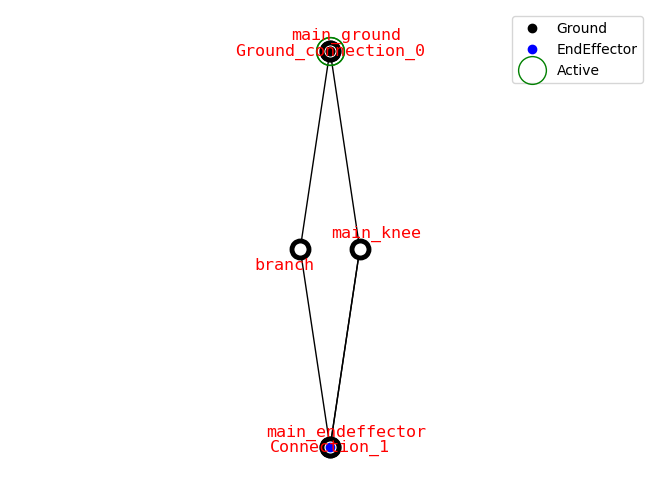

In [3]:
import multiprocessing
from matplotlib.ticker import LinearLocator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.core.problem import StarmapParallelization
from auto_robot_design.generator.restricted_generator.two_link_generator import TwoLinkGenerator, visualize_constrains

from auto_robot_design.optimization.saver import (
    ProblemSaver, )
from auto_robot_design.description.builder import jps_graph2pinocchio_robot
from auto_robot_design.description.utils import draw_joint_point
from auto_robot_design.optimization.problems import CalculateCriteriaProblemByWeigths, get_optimizing_joints
from auto_robot_design.optimization.optimizer import PymooOptimizer
from auto_robot_design.pinokla.calc_criterion import ActuatedMass, EffectiveInertiaCompute, ImfCompute, ManipCompute, MovmentSurface, NeutralPoseMass, TranslationErrorMSE, ManipJacobian
from auto_robot_design.pinokla.criterion_agregator import CriteriaAggregator
from auto_robot_design.pinokla.criterion_math import ImfProjections
from auto_robot_design.pinokla.default_traj import convert_x_y_to_6d_traj_xz, get_simple_spline, get_vertical_trajectory, create_simple_step_trajectory,get_workspace_trajectory
from auto_robot_design.optimization.rewards.reward_base import PositioningReward, PositioningConstrain, PositioningErrorCalculator, RewardManager, PositioningReward
from auto_robot_design.optimization.rewards.jacobian_and_inertia_rewards import HeavyLiftingReward, AccelerationCapability, MeanHeavyLiftingReward, MinAccelerationCapability
from auto_robot_design.optimization.rewards.pure_jacobian_rewards import VelocityReward
from auto_robot_design.optimization.rewards.inertia_rewards import MassReward, TrajectoryIMFReward
from auto_robot_design.description.actuators import TMotor_AK10_9, TMotor_AK60_6, TMotor_AK70_10, TMotor_AK80_64, TMotor_AK80_9
from auto_robot_design.description.builder import ParametrizedBuilder, DetailedURDFCreatorFixedEE, jps_graph2pinocchio_robot, MIT_CHEETAH_PARAMS_DICT
from auto_robot_design.utils.configs import get_standard_builder, get_standard_crag, get_standard_trajectories, get_standard_rewards, get_mesh_builder

from auto_robot_design.generator.user_generator.graph_generator import TopologyManager2D
from auto_robot_design.description.kinematics import JointPoint

tp = TopologyManager2D()
# creates ground connection
tp.add_connection(ground=True, self_mutation_range= [(-0.2001, 0.1999),None,(-0.1, 0.1)], dependent_mutation_range=[(-0.13,0.07),None,(-0.3,-0.1)])
main_ground_jp = JointPoint(r=None, w=np.array([0, 1, 0]), active=True, name='main_ground',attach_ground=True, attach_endeffector=False)
tp.add_absolute_node(jp=main_ground_jp, initial_coordinates=np.array([0, 0, 0]), mutation_range=[None,None,None], freeze_pos=np.array([0,0,0]))
main_knee_jp = JointPoint(r = None, w=np.array([0, 1, 0]), active=False, name='main_knee', attach_ground=False, attach_endeffector=False)
tp.add_absolute_node(jp=main_knee_jp, parent_branch_idx=0, initial_coordinates=[0.03, 0, -0.2], mutation_range=[None,None,(-0.1,0.1)], freeze_pos=np.array([0.03,0,None]))
# creates connection on the first link
tp.add_connection(ground=False, self_mutation_range= [(-0.2,0.2),None,(-0.4,0.4)], dependent_mutation_range=[(-0.1,0.1),None,(-0.1,0.1)])
main_endeffector_jp = JointPoint(r = None, w=np.array([0, 1, 0]), active=False, name='main_endeffector',attach_ground=False, attach_endeffector=True)
tp.add_absolute_node(jp=main_endeffector_jp, parent_branch_idx=0, initial_coordinates=np.array([0.0, 0, -0.4]), mutation_range=[None,None,None], freeze_pos=np.array([0.,0,-0.4]))
# creates connection on the second link
tp.add_connection(ground=False, self_mutation_range= [(-0.2,0.2),None,(-0.5, 0.3)], self_freeze_pos=[0.0,0,-0.4999], dependent_mutation_range=[(-0.2,0.0),None,(-0.0,0.2)])
# creates branch node and one-joint branch in the topology manager. 
branch_jp = JointPoint(r=None, w=np.array([0, 1, 0]), active=False, name='branch', attach_ground=False, attach_endeffector=False)
tp.add_relative_node(branch_jp)
# adds a dependent connection of the one-joint branch to the 
tp.add_dependent_connection(0,1,connect_head=True)
# adds independent connection to the second link finishing the branch building
tp.add_independent_connection(tp.branch_ends[1][1],tp.connections[2].connection_jp)
tp.set_mutation_ranges()
tp.visualize()
graph = tp.graph
initial_x = tp.generate_central_from_mutation_range()

builder = get_standard_builder()
crag = get_standard_crag(open_loop=False)
trajectories = get_standard_trajectories()
rewards = get_standard_rewards()

trajectory_name = 'step1'
reward_name = 'dexterity'
trajectory = trajectories[trajectory_name]
error_calculator = PositioningErrorCalculator(jacobian_key="Manip_Jacobian")
soft_constraint = PositioningConstrain(error_calculator=error_calculator, points=[trajectory])
mr  = tp.mutation_ranges
print(tp.mutation_ranges)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19


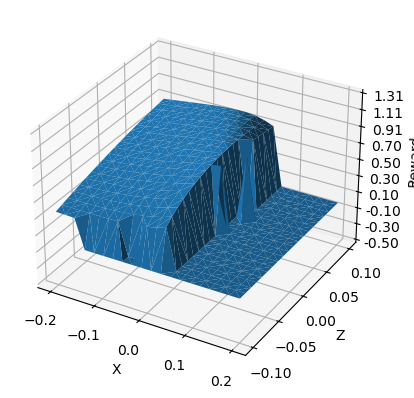

In [4]:
nx = 20
nz = 20

range_idx_1 = 0
range_idx_2 = 1
range_1 = mr[list(mr.keys())[range_idx_1]]
range_2 = mr[list(mr.keys())[range_idx_2]]


x = np.linspace(range_1[0],range_1[1],num=nx,endpoint=True)
z = np.linspace(range_2[0],range_2[1],num=nz,endpoint=True)

X, Z = np.meshgrid(x, z)
res = np.zeros((nx, nz))
pos_error = np.zeros((nx, nz))

x=initial_x.copy()
for i in range(nx):
    for j in range(nz):
        x[range_idx_1] = X[i,j]
        x[range_idx_2] = Z[i,j]
        fixed_robot, free_robot = jps_graph2pinocchio_robot(tp.get_graph(x), builder=builder)
        constrain_error, results = soft_constraint.calculate_constrain_error(crag, fixed_robot, free_robot)
        if constrain_error == 0:
            reward, reward_list = rewards[reward_name].calculate(results[0][0], results[0][1], results[0][2], Actuator = builder.actuator['default'])
            res[i,j] = reward
            
        else:
            res[i,j] = 0
        
    print(f"i={i}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmhot = plt.get_cmap("summer")
ax.plot_trisurf(X.flatten(), Z.flatten(), res.flatten(), antialiased=True)
# ax.plot_surface(X, Z, res,  linewidth=0.2, antialiased=True)
# sct = ax.scatter(X.flatten(), Z.flatten(), res.flatten(), s=np.abs(pos_error.flatten())*5e3, c=np.abs(pos_error.flatten())*10, cmap=cmhot)
ax.set_zlim(res.min()-0.5, res.max()+0.5)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
# fig.colorbar(sct, shrink=0.5, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Reward')
plt.show()
